<a href="https://colab.research.google.com/github/MK316/Spring2023/blob/main/DL/DL_midterm_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💦**Digital Literacy (Spring 2023): Midterm result analysis**

+ [Part 1: coding](https://github.com/MK316/workspace/blob/main/dl230503.ipynb)
+ [Part II: Form](https://docs.google.com/forms/d/1cSEPfQp41pI7aRQeADE1nmwtE412MlQWhtStVtUwvrQ/edit#question=2075772843&field=1847637551)



## Get ready: file to read

In [27]:
#@markdown Google mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
#@markdown Reading the result file (DL_total_new.csv) > df
import pandas as pd
import matplotlib.pyplot as plt

url = "/content/drive/MyDrive/myclass/S2023/S23_DL_total_new.csv"

df = pd.read_csv(url, encoding = "utf-8")
#df.head()

In [30]:
drive.flush_and_unmount()

Todo - Data trim: remove names  
Select columns other than 'Names'

## Data trim

In [82]:
selected = ["Coding","Form","Midterm","Total","Email", "Group"]
data = df[selected]
data.head()

,Coding,Form,Midterm,Total,Email,Group
0,15.3,18.0,16.65,33.3,grb011213@gmail.com,G6
1,16.0,23.0,19.50,39.0,dbdb7214@gmail.com,G5
2,19.0,27.0,23.00,46.0,wise241112@gmail.com,G3
3,1.5,16.0,8.75,17.5,kimkunhui03@gmail.com,G1
4,17.0,22.0,19.50,39.0,evakmj1881@gmail.com,G1


Todo - hide Email address partially :-)  
e.g., last 4 characters of each account

In [83]:
NID = df["Email"]
temp = list(NID)

nlist = []

for i in NID:
  nid = i[-14:-10]
  nlist.append(nid)

print(nlist)

['1213', '7214', '1112', 'ui03', '1881', 'ng29', 'n715', 'hkim', 'nce2', '1234', '3903', '0115', '8bsh', '5387', '.dee', 'n324', 'ii03', '3717', 'ndon', 'r324', '3329', '.lgh', '2472', 'yeon', 'ujmt', '0924', 'onim', 'm316', '0258', '0321', 'g031']


Todo - replace the original Email column with the new list

In [84]:
data["Email"] = nlist
data.head()

<ipython-input-84-0ab6803d9bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Email"] = nlist


,Coding,Form,Midterm,Total,Email,Group
0,15.3,18.0,16.65,33.3,1213,G6
1,16.0,23.0,19.50,39.0,7214,G5
2,19.0,27.0,23.00,46.0,1112,G3
3,1.5,16.0,8.75,17.5,ui03,G1
4,17.0,22.0,19.50,39.0,1881,G1


## **Data visualization: Graphs**

Todo - Boxplot

Data:  Form


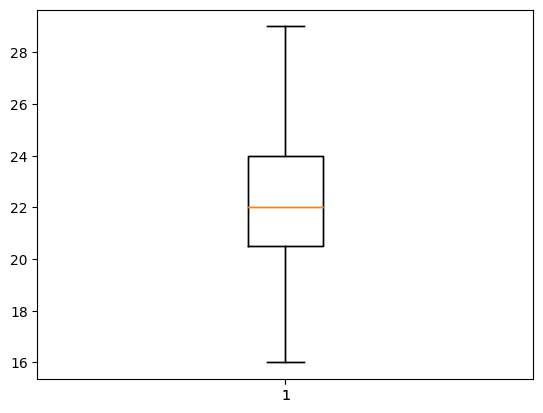

In [85]:
columns = "Form" #@param = ["Coding", "Form","Total","Midterm"]

d1 = data[columns]
plt.boxplot(d1)



# Create boxplot
plt.boxplot(d1)

# Show the plot
print("Data: ", columns)
plt.show()

Top 5 scores

In [86]:
columns = "Coding" #@param = ["Coding", "Form","Total","Midterm"]
#@markdown Descending order (the first five)
n = 31
d1 = data.sort_values(by=[columns], ascending = False)
d1.reset_index(drop=True, inplace=True)
ID = range(1,n+1); d1['Email'] = ID; d1[columns].head()

0    28.5
1    28.0
2    24.0
3    21.5
4    21.0
Name: Coding, dtype: float64

Histogram

Data:  Midterm


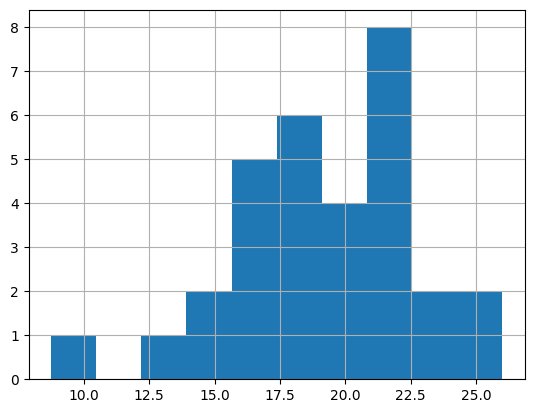

In [63]:
columns = "Midterm" #@param = ["Coding", "Form","Total","Midterm"]

# Create histogram
data[columns].hist()

print("Data: ", columns)
plt.show()


Data:  Total


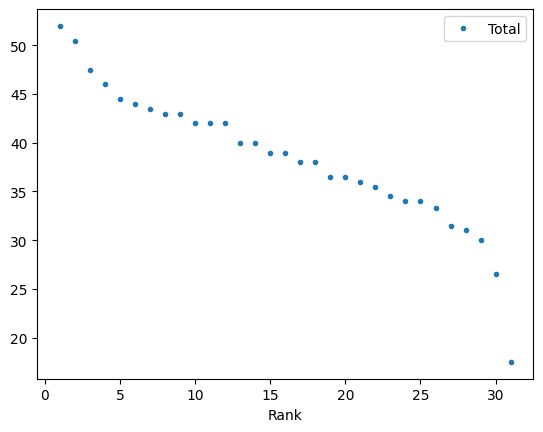

In [87]:
columns = "Total" #@param = ["Coding", "Form","Total","Midterm"]

n = 31
d1 = data.sort_values(by=[columns], ascending = False)
d1.reset_index(drop=True, inplace=True)
ID = range(1,n+1); d1['Rank'] = ID; d1[columns].head()


# Create histogram
d1.plot(x="Rank", y=columns, style='.')

# Show the plot
print("Data: ", columns)
plt.show()



# plt.ylim(0, 31)

In [88]:
d1.head()

,Coding,Form,Midterm,Total,Email,Group,Rank
0,28.0,24.0,26.00,52.0,m316,G4,1
1,28.5,22.0,25.25,50.5,n324,G5,2
2,24.0,23.5,23.75,47.5,hkim,G4,3
3,19.0,27.0,23.00,46.0,1112,G3,4
4,20.5,24.0,22.25,44.5,onim,G2,5


<Axes: xlabel='Group', ylabel='Total'>

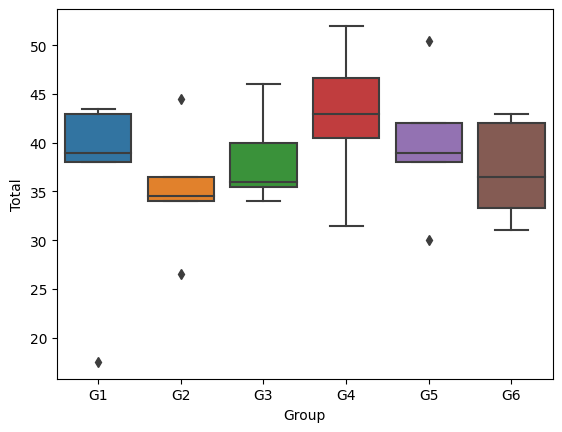

In [92]:
import seaborn as sns

columns = "Total" #@param = ["Coding", "Form","Total","Midterm"]

# Define the order of the groups
group_order = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6']
# Create a boxplot using seaborn
sns.boxplot(x='Group', y=columns, data=data, order = group_order)